
<font color='black'><h1 align='center'>HEART FAILURE PREDICTION </h1></font>



<div>
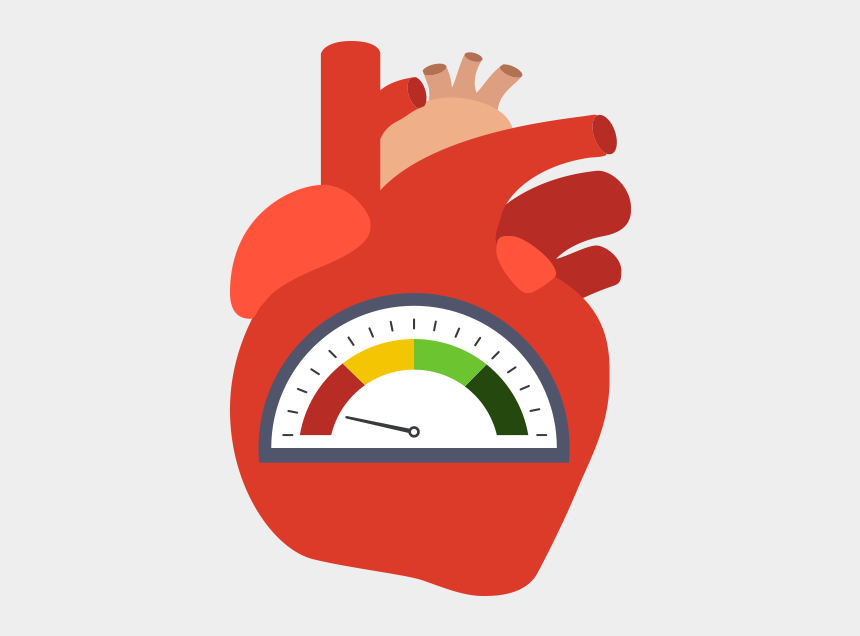
</div>


<h1><em> ABOUT DATASET </em></h1>

<P><EM>Cardiovascular diseases (CVDs) are the <strong>number 1</strong> cause of death globally, taking an estimated 17.9 million lives each year, which accounts for <strong>31%</strong> of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as <strong>tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol</strong> using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.</EM></P>

<h1><em> OBJECTIVE </em></h1>

<P><EM>The primary objective of this notebook is <strong>to visualize the trends in the dataset and to predict the heart failure of different patients</strong>. There could be many reasons behind the heart failure. We'll use Python's visualization libraries to understand the trends lying in the patient dataset and then build a model to predict the heart failure.</EM></P>

<h1><EM>DATA</EM></h1>

<em>The dataset we have consist of different attributes of the heart patients as follows.
<ul>
    <li>Age (Age of the patient)</li>
     <li>Creatinine (Level of the CPK enzyme in the blood (mcg/L))</li>
    <li>Aneamia (Decrease of red blood cells or hemoglobin)</li>
    <li>Diabetes (If the patient has diabetes)</li>
    <li>Ejection Fraction (Percentage of blood leaving the heart at each contraction (percentage))</li>
    <li>Hypertension (If the patient has hypertension)</li>
    <li>Platelets (Platelets in the blood (kiloplatelets/mL))</li>
    <li>Serum Creatinine (Level of serum creatinine in the blood (mg/dL))</li>
    <li>Serum Sodium (Level of serum sodium in the blood (mEq/L))</li>
    <li>Sex (Gender of the patient)</li>
    <li>Smoking (If the patient smokes or not (boolean))</li>
    <li>Time (Follow-up period (days))</li>
    <li>Death Event (If the patient deceased during the follow-up period)</li></ul> </em>

<h1><em> SETUP</em> </h1>

In [23]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as py
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



<h1><em> IMPORTING DATASET</em> </h1>

In [24]:
hf= pd.read_csv('Downloads\project1\heart_failure.csv')


<h1><em> LET'S EXPLORE THE DATA</em> </h1>

<em> The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using thehead(), shape, desribe(),dtypes and info() methods before I actually start processing and visualizing it.</em>

In [25]:
#first five rows of the dataset
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<em> 0 = No,1=Yes</em>
<em> 0= Male , 1= Female</em>

In [26]:
#no. of rows and columns in this dataset
hf.shape

(299, 13)

In [27]:
hf['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

203-Survived ,
96 - Not Survived

In [28]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [29]:
# datatypes in the dataset
hf.dtypes


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [30]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


<h1><em> DATA VISUALIZATION</em> </h1>

<EM>Now, we can use visualizations techniques to better understand our data using <strong>matplotlib</strong> and <strong>seaborn.</strong></EM>

<h3> Correaltion of data</h3>

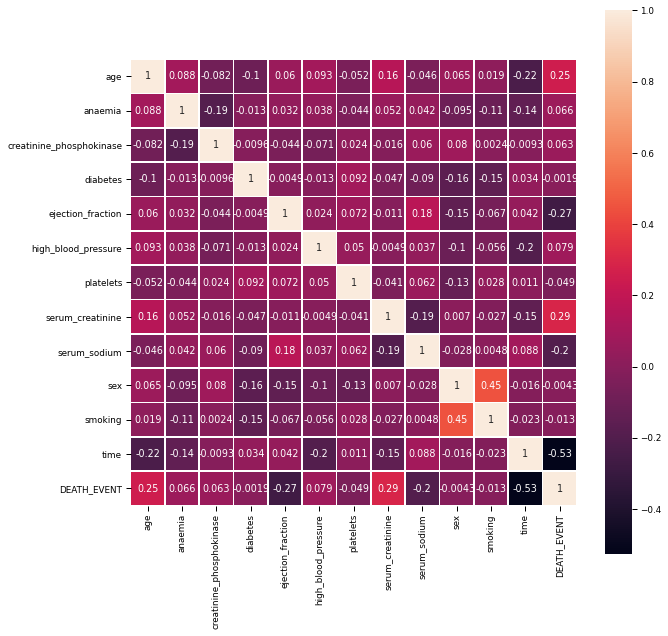

In [240]:

py.figure(figsize=(10,10))
sns.heatmap(hf.corr(),square = True,linewidths=.5, annot=True)
py.show()

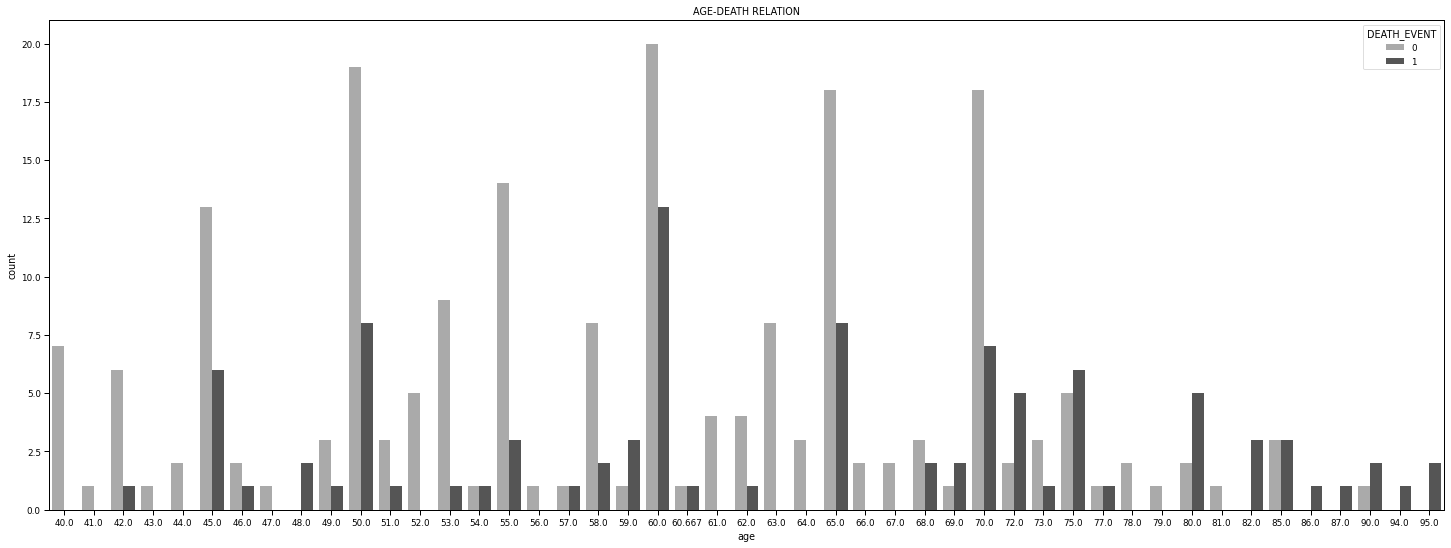

In [241]:
py.figure(figsize=(25,9))
sns.set_context('paper')
py.title('AGE-DEATH RELATION')
sns.countplot(x='age',data=hf, hue='DEATH_EVENT', palette='gray_r')


 <em>We observe that people above <strong>68 years</strong> died due to heart failure.</em>

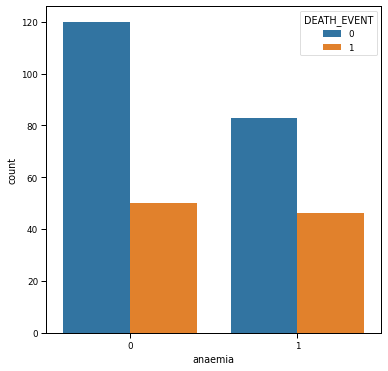

In [249]:
f,ax = py.subplots(figsize=(6,6))
ax=sns.countplot(x="anaemia",hue="DEATH_EVENT",data=hf)
patch = ax.patches

<em> It can be observed that patients with Anaemia are at higher risk.</em>

Text(0.5, 1.0, 'Sex-Death Realtion')

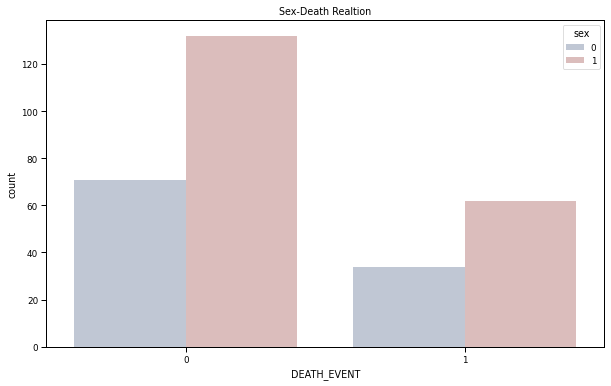

In [257]:
py.figure(figsize=(10,6))
sns.countplot(x=hf.DEATH_EVENT, hue=hf.sex ,palette='vlag')
py.title("Sex-Death Realtion")



<em> <b>Males</b> are at more risk.</em>

Text(0.5, 1.0, 'Percentage of Diabetic and Non-Diabetic Patients')

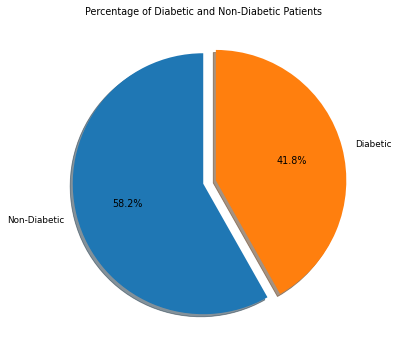

In [265]:
py.figure(figsize=(10,6))
data_diabetes = hf["diabetes"].value_counts()
py.pie(data_diabetes,explode=(0,0.1),labels=["Non-Diabetic","Diabetic"],shadow=True,startangle=90,autopct="%1.1f%%")
py.title("Percentage of Diabetic and Non-Diabetic Patients")

Text(0.5, 1.0, 'Relation with Diabetes')

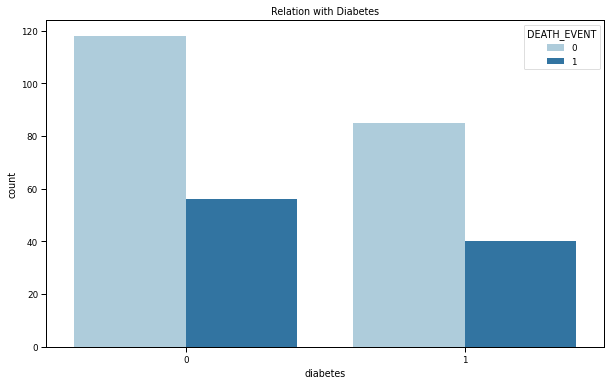

In [276]:
py.figure(figsize=(10,6))
sns.countplot(data=hf, x='diabetes',hue='DEATH_EVENT', palette='Paired')
py.title("Relation with Diabetes")

<em> According to our samples, diabetes does <b>not</b> play a big role in heart attacks.</em>

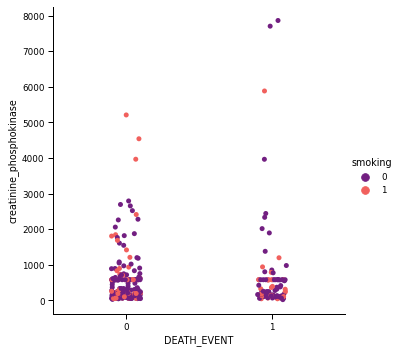

In [272]:
sns.catplot( y="creatinine_phosphokinase",x='DEATH_EVENT',hue='smoking', data=hf, palette="magma")

           


<em> CP has <b>lower</b> impact on death event.

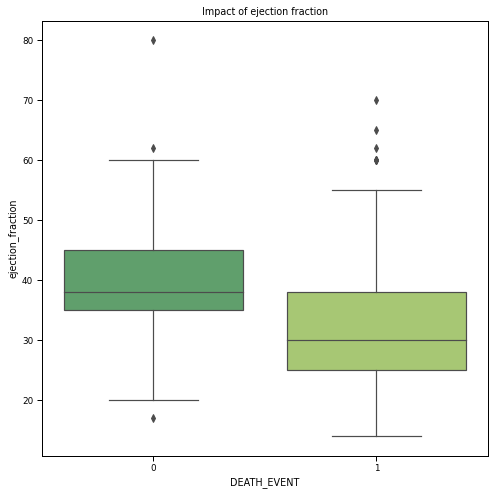

In [275]:
py.figure(figsize=(8,8))
py.title('Impact of ejection fraction')
sns.boxplot(data=hf, y='ejection_fraction', x='DEATH_EVENT', palette='summer')

<em> It can be seen that people with <b>low</b> ejection fraction are at higher risk.


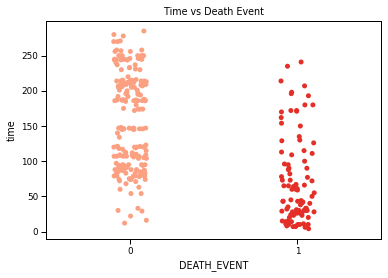

In [193]:
sns.stripplot(data=hf, x="DEATH_EVENT", y="time", palette='Reds')
py.title('Time vs Death Event')
py.show()

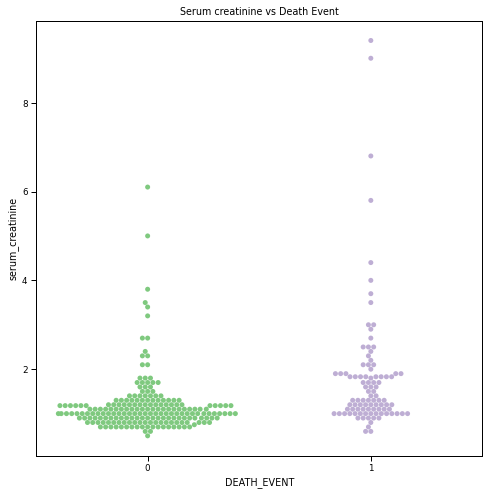

In [277]:
py.figure(figsize=(8,8))
sns.swarmplot(data=hf, x="DEATH_EVENT", y="serum_creatinine", palette='Accent')
py.title('Serum creatinine vs Death Event')
py.show()

<em> We can observe that maintaining <b>low serum creatinine </b> is good for health.</em>

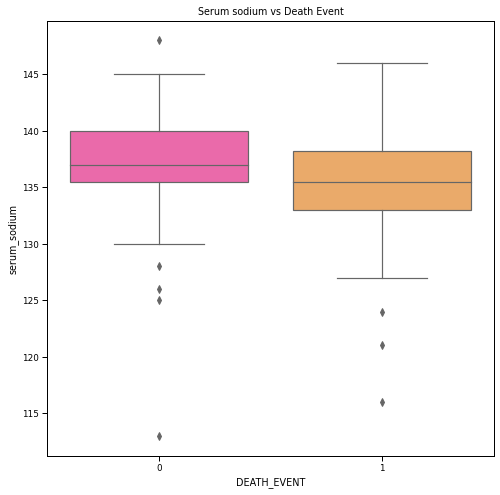

In [281]:
py.figure(figsize=(8,8))
sns.boxplot(data=hf, x="DEATH_EVENT", y="serum_sodium" , palette='spring')
py.title('Serum sodium vs Death Event')
py.show()

<em> We can observe that  <b>low serum sodium </b> is at not good.</em>

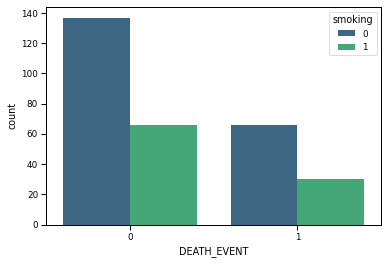

In [286]:
sns.countplot(data= hf, x='DEATH_EVENT', hue='smoking',palette='viridis')

<em> Found <b> higher death rate </b> among the people who smoke.</em>

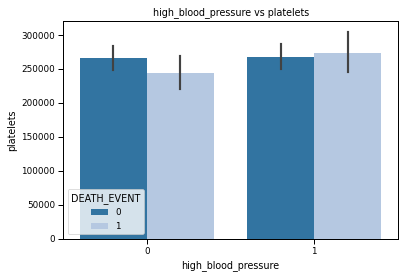

In [287]:
sns.barplot(data=hf, x='high_blood_pressure', y='platelets', hue='DEATH_EVENT' ,palette='tab20')
py.title('high_blood_pressure vs platelets')
py.show()

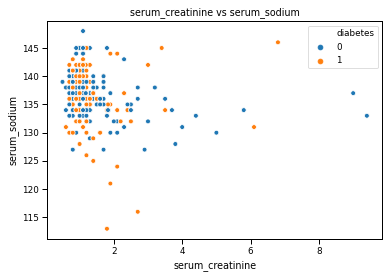

In [209]:
sns.scatterplot(data=hf, x='serum_creatinine', y='serum_sodium', hue='diabetes')
py.title('serum_creatinine vs serum_sodium')
py.show()

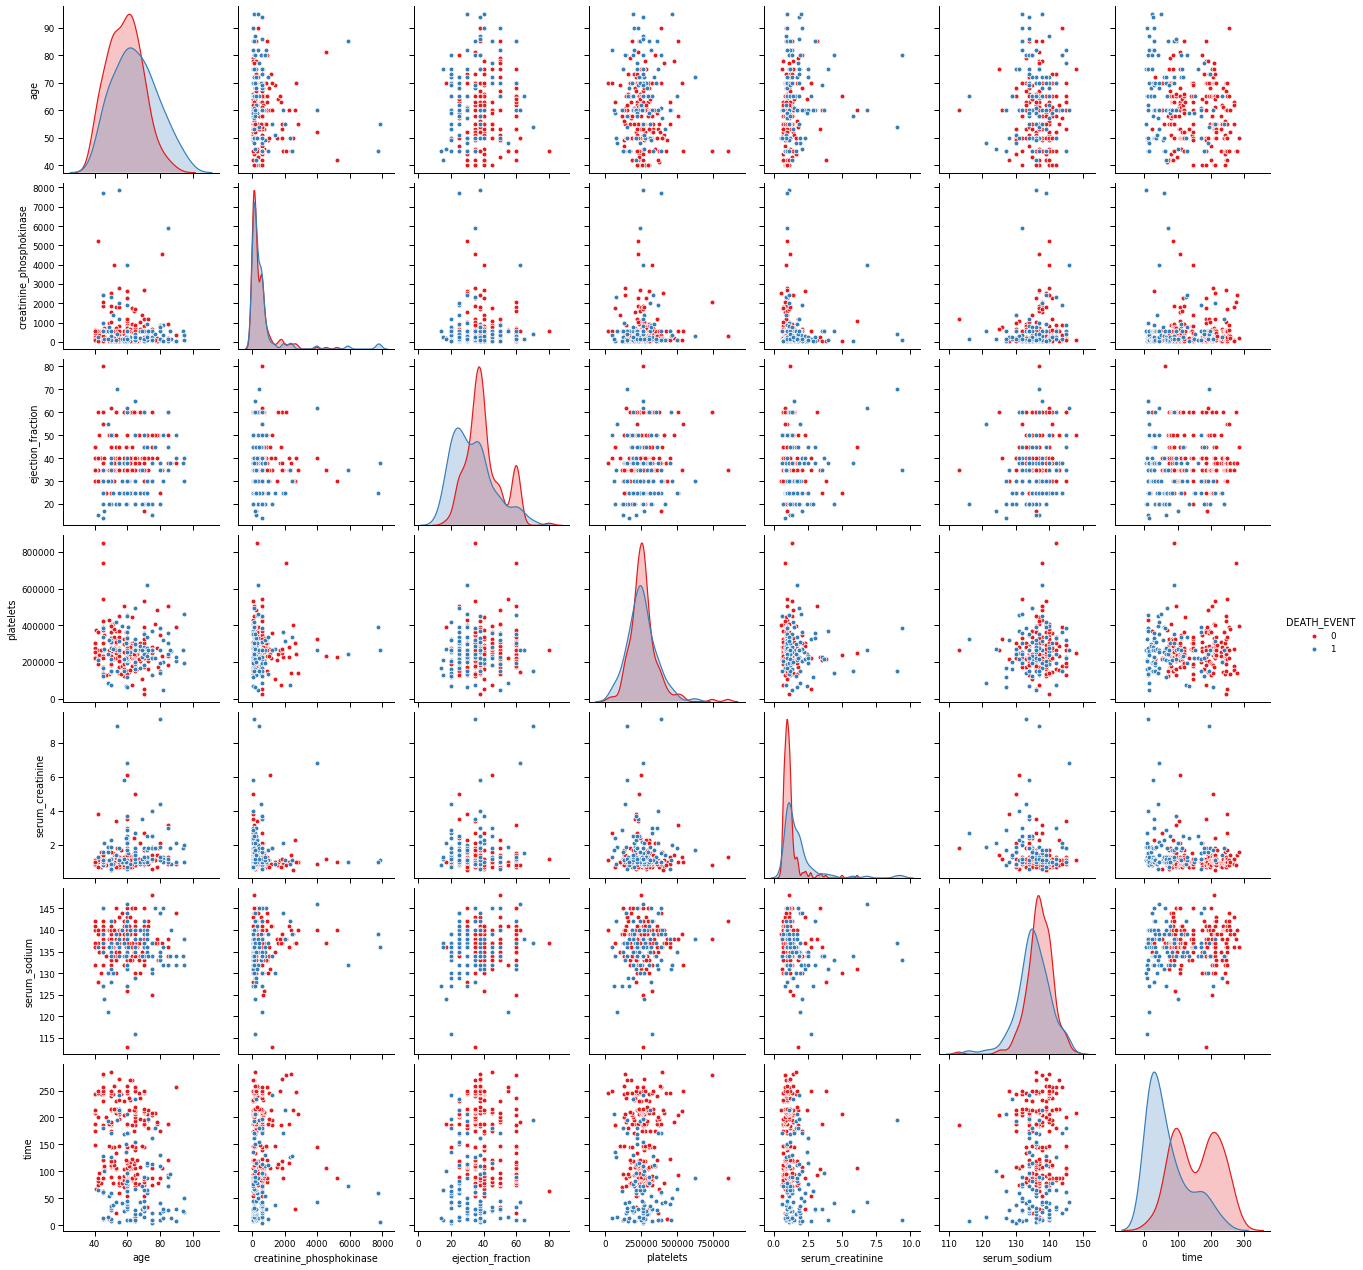

In [214]:
sns.pairplot(data=hf[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']], hue='DEATH_EVENT', palette='Set1')

<em><h1> Summarizing the Data Visualization</h1></em>


<em>Let us check if the if the findings from the heatmap corroborate to the EDA that we have done so far.</em>
<ul>
    <li>We have seen higher age patients are at higher risk and in the heatmap also we can see there is a strong positive       correlation between age and Death_Event.</li>
    <li>Anaemic patients are at higher risk as per our findings and we can see a postive correlation in the heatmap.</li>    
    <li>For Creatanine Phosphokinase we were unable to find a definite relation to the death rate.</li>
    <li>For ejection fraction both our heatmap and analysis earlier are the same, higher the ejection rate lower the risk.</li>
    <li>For diabetes we concluded that we could not find a strong correlation to the death rate. The heatmap also shows a very small negative correlation to the detah rate.</li>
    <li>Higher the blood pressure higher the risk of death event, again our heatmap and analysis are in sync.</li>
    <li>More platelets count is good for health.</li>
    <li>For smoking we failed to find any correlation with the death rate.</li>
    <li>Serum Cretanine and Serum Sodium are positively and negatively correlated to the death rate both according our analysis and the heatmap.</li>
    